In [1]:
from fenics import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

T = 1.0            # final time
num_steps = 100     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta
sigma = 1.0

# Create mesh and define function space
nx, ny = 100, 2
mesh = RectangleMesh(p0=Point(0, 0), p1=Point(20, 2), nx=nx, ny=ny)
V = FunctionSpace(mesh, 'P', 1)

Note that since our form does not involve a boundary integral we are
implicitly giving it Neumann (reflecting) boundary conditions.
Given this, we don't want to specify any further boundary conditions.

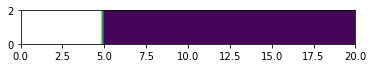

In [2]:
u_n = Expression(f"x[0] < {np.max(mesh.coordinates()[:,0]) / 4} ? 1 : 0;", element=V.ufl_element())
u_n = interpolate(u_n, V)
plot(u_n);

In [3]:
set_log_active(False)

In [4]:
# Define initial value
u_n = Expression(f"x[0] < {np.max(mesh.coordinates()[:,0]) / 4} ? 1 : 0;", element=V.ufl_element())
u_n = interpolate(u_n, V)

# Define variational problem
u = Function(V)
v = TestFunction(V)
F = u * v * dx + dt * (sigma**2 / 2) * dot(grad(u**2), grad(v)) * dx - dt * u * (1 - u) * v * dx - u_n * v * dx

output = {}
# Time-stepping
for n in range(num_steps):
    # Compute solution
    solve(F == 0, u)

    # Update previous solution
    u_n.assign(u)
    
    output[n * dt] = u.copy(deepcopy=True)

# Hold plot
plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


0.0


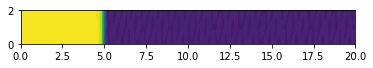

0.01


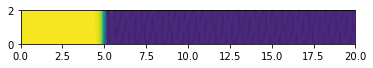

0.02


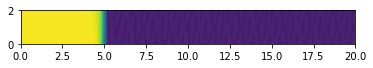

0.03


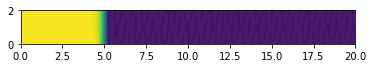

0.04


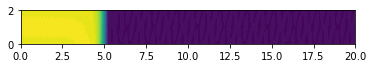

0.05


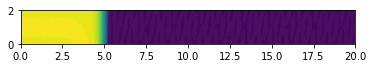

0.06


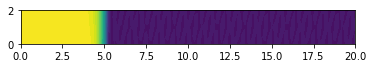

0.07


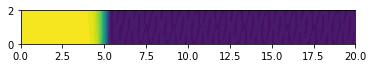

0.08


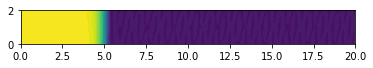

0.09


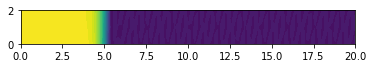

0.1


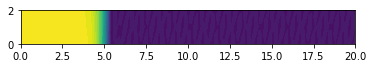

0.11


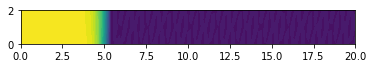

0.12


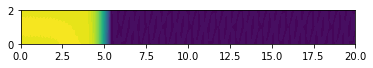

0.13


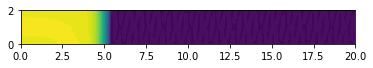

0.14


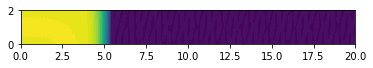

0.15


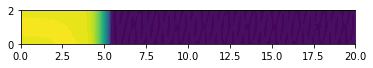

0.16


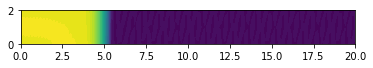

0.17


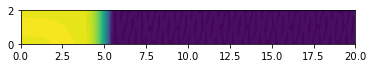

0.18


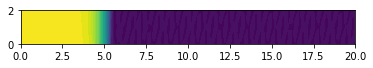

0.19


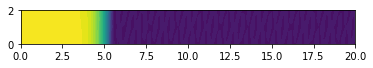

0.2


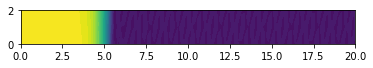

0.21


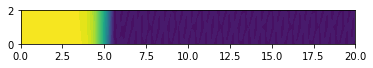

0.22


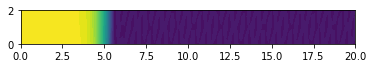

0.23


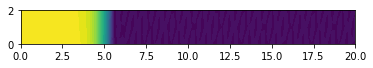

0.24


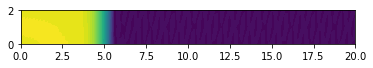

0.25


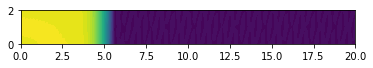

0.26


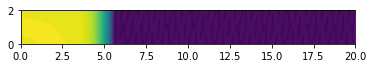

0.27


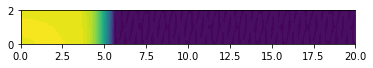

0.28


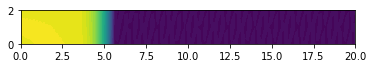

0.29


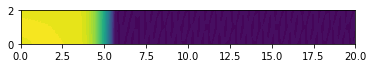

0.3


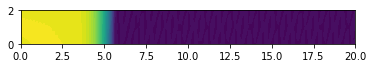

0.31


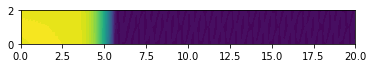

0.32


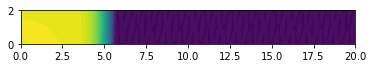

0.33


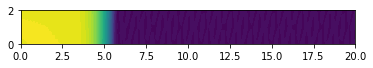

0.34


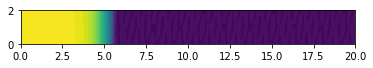

0.35000000000000003


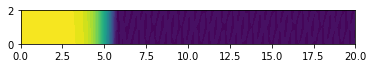

0.36


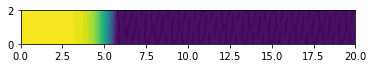

0.37


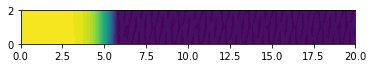

0.38


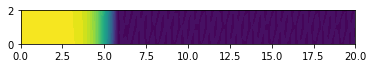

0.39


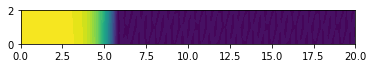

0.4


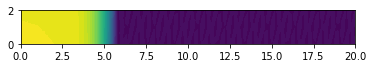

0.41000000000000003


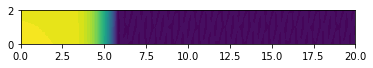

0.42


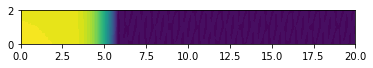

0.43


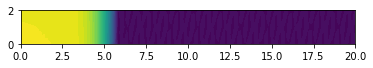

0.44


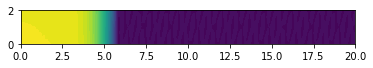

0.45


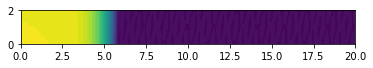

0.46


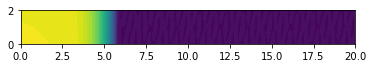

0.47000000000000003


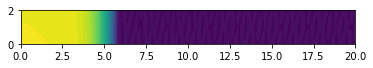

0.48


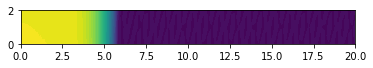

0.49


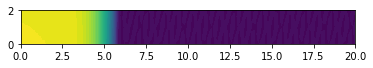

0.5


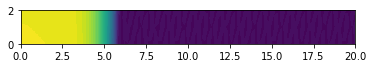

0.51


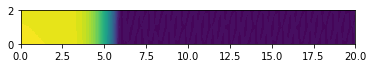

0.52


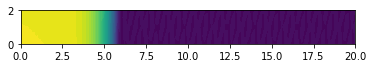

0.53


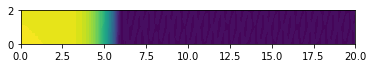

0.54


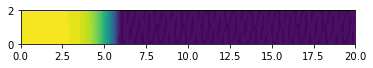

0.55


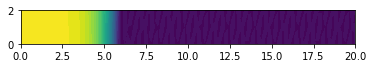

0.56


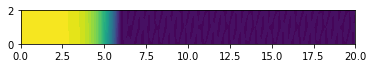

0.5700000000000001


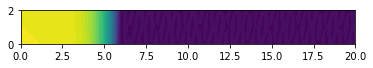

0.58


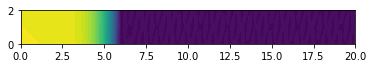

0.59


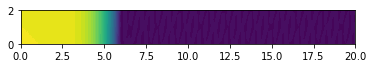

0.6


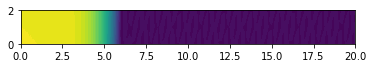

0.61


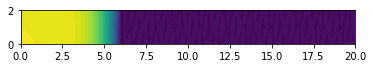

0.62


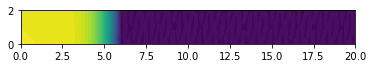

0.63


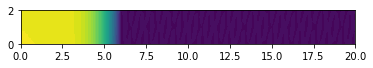

0.64


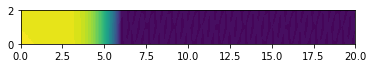

0.65


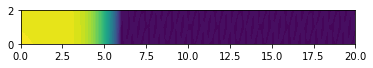

0.66


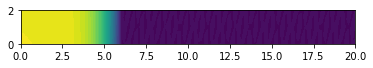

0.67


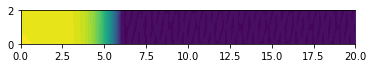

0.68


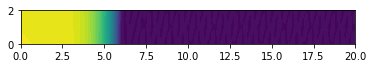

0.6900000000000001


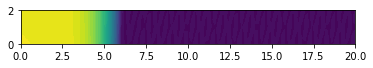

0.7000000000000001


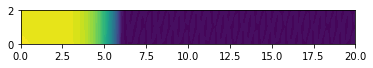

0.71


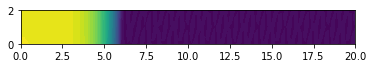

0.72


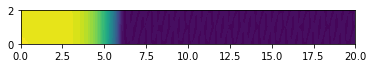

0.73


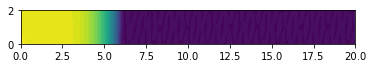

0.74


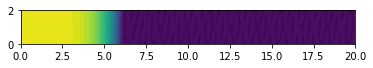

0.75


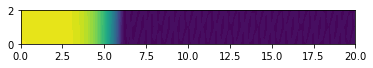

0.76


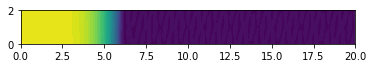

0.77


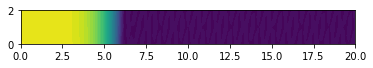

0.78


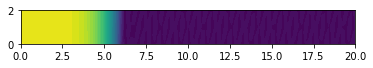

0.79


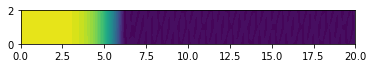

0.8


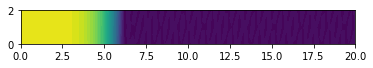

0.81


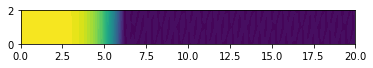

0.8200000000000001


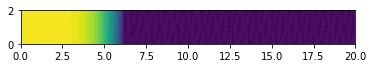

0.8300000000000001


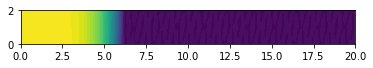

0.84


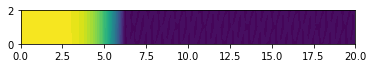

0.85


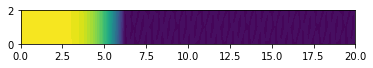

0.86


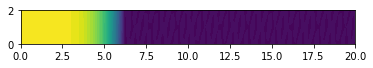

0.87


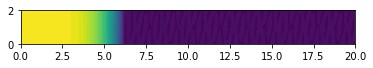

0.88


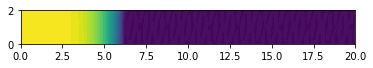

0.89


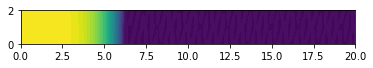

0.9


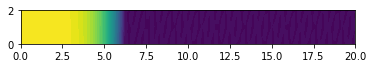

0.91


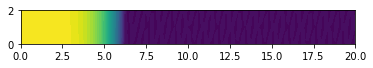

0.92


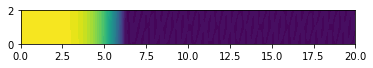

0.93


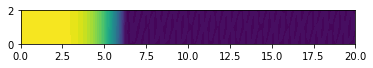

0.9400000000000001


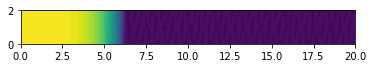

0.9500000000000001


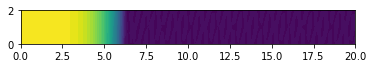

0.96


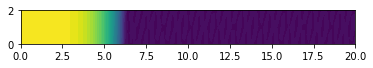

0.97


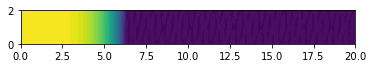

0.98


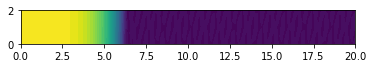

0.99


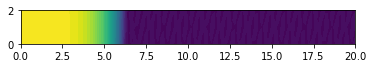

In [5]:
#for t in output:
#    print(t)
#    plot(output[t])
#    plt.show()

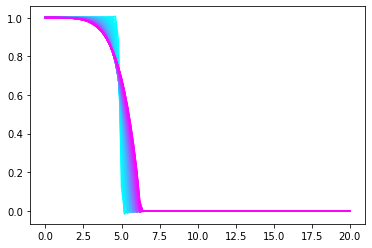

In [6]:
cm = matplotlib.cm.cool

ij = V.tabulate_dof_coordinates()
ut = ij[:,1] == 0.0

fig, ax = plt.subplots()
for t in output:
    uvec = output[t].vector()[:]
    ax.plot(ij[ut,0], uvec[ut], c=cm(t/T))